# Método Gauss-Newton
Fonte: CHAPRA, Steven; CANALE, Raymond. Métodos Numéricos
para Engenharia. 7a Edição. Porto Alegre: Bookman, 2016, p. 442 - 448.

O método de Gauss-Newton é um algoritmo para minimizar a soma dos quadrados dos resíduos entre os dados e as equações não lineares. O conceito chave subjacente a essa técnica é que uma expansão em série de Taylor é usada para expressar a equação não linear original em uma forma aproximada linear. A seguir, a teoria dos mínimos quadrados pode ser usada para se obter novas estimativas dos parâmetros que se movam na direção de minimizar o resíduo.

Para ilustrar como isso é feito, a relação entre a equação não linear e os dados pode ser expressa genericamente como

$$y_i = f(x_i; a_0,a_1,...,a_m) + e_i$$

onde $y_i$ é um valor medido da variável dependente, $f(x_i; a_0, a_1, ..., a_m)$ é a equação que é uma função da variável independente $x_i$ e uma função não linear dos parâmetros $a_0$, $a_1$, . . . , $a_m$ e $e_i$ é um erro aleatório. Por conveniência, esse modelo pode ser expresso na forma abreviada pela omissão dos parâmetros
$$y_i = f(x_i) + e_i$$

O modelo não linear pode ser expandido por uma série de Taylor em torno dos valores dos parâmetros e truncada depois da primeira derivada. Por exemplo, para um caso com 2 parâmetros

$$ f(x_i)_{j+1} = f(x_i)_j + \frac{\partial f(x_i)_j}{\partial a_0} \Delta a_0 + \frac{\partial f(x_i)_j}{\partial a_1} \Delta a_1$$

onde $j$ é a aproximação inicial, $j+1$ é a previsão, $\Delta a_0 = a_{0, j+1} + a_{0, j}$  e $\Delta a_1 = a_{1, j+1} + a_{1, j}$. Logo, linearizamos o modelo inicial com relação aos parâmetros. A equação acima pode ser substituída na equaçãoanterior para fornecer


$$ y_i - f(x_i)_j =  \frac{\partial f(x_i)_j}{\partial a_0} \Delta a_0 + \frac{\partial f(x_i)_j}{\partial a_1} \Delta a_1 + e_i$$

ou, na forma matricial 

$$[D]=[Z_j]\{\Delta A\}+\{E\} $$

onde $[Z_j]$ é a matriz das derivadas parciais da função calculada na aproximação inicial $j$,

$$\begin{bmatrix} 
\frac{\partial f(x_1)}{\partial a_0} & \frac{\partial f(x_1)}{\partial a_1}\\ 
\frac{\partial f(x_2)}{\partial a_0} & \frac{\partial f(x_2)}{\partial a_1}\\
\vdots & \vdots\\ 
\frac{\partial f(x_n)}{\partial a_0} & \frac{\partial f(x_n)}{\partial a_1}\\
\end{bmatrix}$$


onde $n$ é o número de pontos dados e $\frac{\partial f(x_i)}{\partial a_k}$ é a derivada parcial da função com relação ao $k$-ésimo parâmetro calculada no $i$-ésimo ponto dado. O vetor $\{D\}$ contém as diferenças entre as medidas e os valores da função

$$\begin{bmatrix} 
y_1 - f(x_1)\\ 
y_2 - f(x_2)\\ 
\vdots \\
y_n - f(x_n)
\end{bmatrix}$$

O vetor  $\{\Delta A\}$ contém a variação nos valores dos parâmetros,


$$\{\Delta A\} = 
\begin{bmatrix} 
\Delta a_0\\ 
\Delta a_1\\ 
\vdots \\
\Delta a_n
\end{bmatrix}$$

Assim, a abordagem consiste em resolver a equação 

$$\left[[Z_j]^T[Z_j]\right] \{\Delta A\} = \left[[Z_j]^T\{D\}\right]  $$ 

determinando $\{\Delta A\}$, o qual pode ser usado para calcular valores melhorados para os parâmetros como em

$$ a_{0,j+1} = a_{0,j+1}+\Delta a_0$$
e
$$ a_{1,j+1} = a_{1,j+1}+\Delta a_1$$

Esse procedimento é repetido até que a solução convirja,ou seja, até que

$$ \vert \epsilon _k \vert = \left\vert \frac{a_{0,j+1} - a_{0,j+1}}{a_{1,j+1}} \right\vert$$

fique abaixo de um critério de parada aceitável.


## Exemplo 1 - Resolução computacional

Vamos ajustar a função $f(x)=a_0(1-e^{-a_1x})$ aos dados 

$$
\begin{array}{cccccc}
\hline
x &0.25  &0.75  &1.25  &1.75  &2.25  \\ \hline
y &0.28  &0.57  &0.68  &0.74  &0.79  \\
\hline
\end{array}
$$

usando aproximação inicial $a_0=1.0$ e $a_1=1.0$  para os parâmetros. 

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

from sympy import *
init_printing(use_unicode=True)

In [2]:
# Criando os arrays com os dados tabelados

xi = np.array([0.25, 0.75, 1.25, 1.75, 2.25])
yi = np.array([0.28, 0.57, 0.68, 0.74, 0.79])

In [3]:
# definindo a função aproximadora
a0, a1, x= symbols("a0, a1, x")
g = a0*(1-np.e**(-a1*x))
g

In [4]:
# obtendo as derivadas
dgda0 = diff(g,a0)
dgda0

In [5]:
dgda1 = diff(g,a1)
dgda1

In [6]:
# tornando as funções g(x) e suas derivadas 'avaliáveis'
g = lambdify((x, a0, a1), g)
dgda0 = lambdify((x,a0,a1), dgda0)
dgda1 = lambdify((x,a0,a1), dgda1)

In [7]:
# chute inicial
A = np.array([1.0, 1.0])

In [8]:
Z = np.array([dgda0(xi,A[0],A[1]), dgda1(xi,A[0],A[1])]).T
np.round(Z,4)

array([[0.2212, 0.1947],
       [0.5276, 0.3543],
       [0.7135, 0.3581],
       [0.8262, 0.3041],
       [0.8946, 0.2371]])

In [9]:
ZtZ=np.dot(Z.T,Z)
print (ZtZ)

[[2.3193616  0.94893157]
 [0.94893157 0.44039547]]


In [10]:
ZtZ_inv=inv(ZtZ)
print (ZtZ_inv)

[[ 3.64067814 -7.84466377]
 [-7.84466377 19.17378717]]


In [11]:
# Condicionamento
print(np.linalg.cond(ZtZ, p=2))

60.945973979482126


In [12]:
# Vetor das diferenças 
D = yi-g(xi, A[0], A[1])
print(D)
print (np.linalg.norm(D))

[ 0.05880078  0.04236655 -0.0334952  -0.08622606 -0.10460078]
0.1573233630605803


In [13]:
ZtD = np.dot(Z.T,D)
print(ZtD)

[-0.15335612 -0.03656535]


In [14]:
dA = np.dot(ZtZ_inv, ZtD )
print(dA)

[-0.27147736  0.50193087]


In [15]:
A = A + dA
print(A)

[0.72852264 1.50193087]


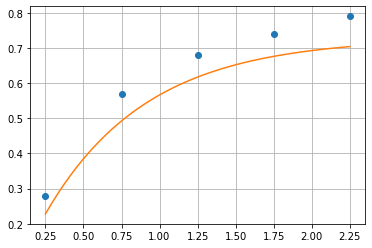

In [16]:
xp = np.linspace(xi[0],xi[-1],51)
plt.plot(xi, yi, "o", xp, g(xp, A[0], A[1]))
plt.grid()
plt.show()

O ajuste não ficou muito bom com apenas uma iteração. Vamos fazer mais algumas!

In [17]:
for i in range(5):
    Z = np.array([dgda0(xi,A[0],A[1]), dgda1(xi,A[0],A[1])]).T
    ZtZ=np.dot(Z.T,Z)
    ZtZ_inv=np.linalg.inv(ZtZ)
    D = yi-g(xi, A[0], A[1])
    ZtD = np.dot(Z.T,D)
    dA = np.dot(ZtZ_inv, ZtD )
    A = A + dA
    print(A)

print (A)
print (np.linalg.norm(D))

[0.7910431  1.67770112]
[0.79185177 1.67526844]
[0.7918669 1.6751459]
[0.79186765 1.67513958]
[0.79186769 1.67513925]
[0.79186769 1.67513925]
0.025722732971042012


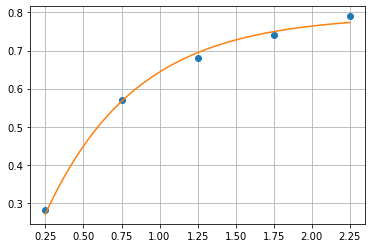

In [18]:
xp = np.linspace(xi[0],xi[-1],51)
plt.plot(xi, yi, "o", xp, g(xp, A[0], A[1]))
plt.grid()
plt.show()

Agora sim, esse é um ótimo ajuste!

## Exemplo 2
Vamos ajustar a função $f(x)=\frac{a_0x}{a1+x}$ aos dados 

$$
\begin{array}{cccccc}
\hline
x &0.038 &0.194 &0.425 &0.626 &1.253 &2.500 &3.740  \\ \hline
y &0.050 &0.127 &0.094 &0.2122  &0.2729 &0.2665 &0.3317  \\
\hline
\end{array}
$$

usando aproximação inicial $a_0=0.9$ e $a_1=0.2$  para os parâmetros.

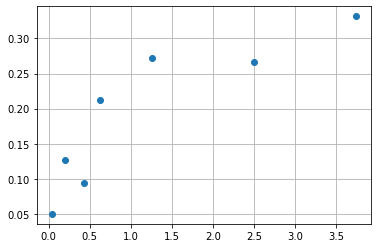

In [19]:
xi = np.array([0.038,0.194,0.425,0.626,1.253,2.500,3.740])
yi = np.array([0.050,0.127,0.094,0.2122,0.2729,0.2665,0.3317])

plt.plot(xi, yi, "o")
plt.grid()
plt.show()

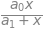

In [20]:
# definindo a função aproximadora
a0, a1, x= symbols("a0, a1, x")
g = (a0*x)/(a1+x)
g

In [21]:
dgda0 = diff(g,a0)
dgda0

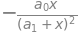

In [22]:
dgda1 = diff(g,a1)
dgda1

In [23]:
# tornando as funções g(x) e suas derivadas 'avaliáveis'
g = lambdify((x, a0, a1), g)
dgda0 = lambdify((x,a0,a1), dgda0)
dgda1 = lambdify((x,a0,a1), dgda1)

In [24]:
# chute inicial
A = np.array([0.9, 0.2])

In [25]:
for i in range(5):
    Z = np.array([dgda0(xi, A[0],A[1]), dgda1(xi, A[0],A[1])]).T
    D = yi-g(xi, A[0], A[1])
    dA = np.dot(inv(np.dot(Z.T,Z)), np.dot(Z.T,D) )
    A = A + dA
    print(A)

print (A)
print (np.linalg.norm(D))

[0.33266293 0.26017391]
[0.34280925 0.42607918]
[0.35777522 0.52950844]
[0.36140546 0.5536581 ]
[0.36180308 0.55607253]
[0.36180308 0.55607253]
0.08856739022235431


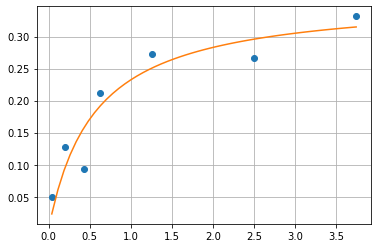

In [26]:
xp = np.linspace(xi[0],xi[-1],51)
plt.plot(xi, yi, "o", xp, g(xp, A[0], A[1]))
plt.grid()
plt.show()

## Exemplo 3
Determine os valores dos coefcientes $a$ e $b$ da função $g(x) =
1 + ae^{bx}$, aos ajustar os valores da tabela abaixo usando o Método dos Mínimos Quadrados.

$$
\begin{array}{cccccc}
\hline
x_i &0 &0.5 &1.0 &2.5 &3.0 \\ \hline
f(x_i) &2.0 &2.6 &3.7 &13.2 &21.0 \\ \hline
\hline
\end{array}
$$

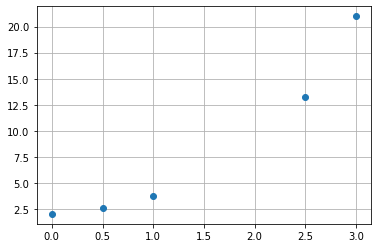

In [104]:
xi = np.array([0, 0.5, 1.0, 2.5, 3.0])
yi = np.array([2.0, 2.6, 3.7, 13.2, 21.0])
plt.plot(xi, yi, "o")
plt.grid()
plt.show()

In [105]:
# definindo a função aproximadora
a0, a1, x= symbols("a0, a1, x")
g = lambda x,a,b: 1+a*np.exp(b*x)

In [106]:
# definindo as derivadas 
dgda0 = lambda x,a,b: np.exp(b*x)
dgda1 = lambda x,a,b: b*a*np.exp(b*x)

In [107]:
# chute inicial
A = np.array([1.5, 1.5])

In [108]:
Z = np.array([dgda0(xi,A[0],A[1]), dgda1(xi,A[0],A[1])]).T
print(Z)

[[  1.           2.25      ]
 [  2.11700002   4.76325004]
 [  4.48168907  10.08380041]
 [ 42.521082    95.6724345 ]
 [ 90.0171313  202.53854543]]


In [109]:
ZtZ=np.dot(Z.T,Z)
print (ZtZ)

[[ 9936.69356802 22357.56052806]
 [22357.56052806 50304.51118813]]


In [110]:
# Condicionamento
print(np.linalg.cond(np.dot(Z.T,Z), p=2))

1.0192937667332826e+16


Observe que o número de condicionamento da matriz é bem alto indicando um mal condicionamento. Possivelmente, dependendo da aproximação inicial, o método não será convergente.

In [111]:
# Vetor das diferenças 
D = yi-g(xi, A[0], A[1])
print(D)

[  -0.5          -1.57550002   -4.02253361  -51.581623   -115.02569695]


In [112]:
ZtD = np.dot(Z.T,D)
print(ZtD)

[-12569.45276511 -28281.2687215 ]


In [113]:
ZtZ_inv=inv(ZtZ)
print (ZtZ_inv)

[[ 3.09237645e+11 -1.37438953e+11]
 [-1.37438953e+11  6.10839793e+10]]


In [114]:
np.dot(ZtZ_inv, ZtD )

array([-1.  , -0.25])

In [115]:
dA = np.dot(ZtZ_inv, ZtD )
print(dA)

[-1.   -0.25]


In [116]:
A = A + dA
print(A)

[0.5  1.25]


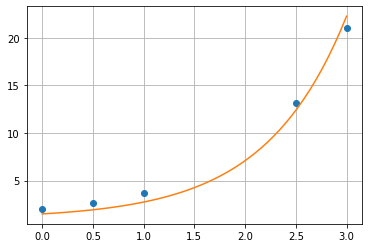

In [117]:
xp = np.linspace(xi[0],xi[-1],51)
plt.plot(xi, yi, "o", xp, g(xp, A[0], A[1]))
plt.grid()
plt.show()

In [118]:
for i in range(5):
    Z = np.array([dgda0(xi, A[0],A[1]), dgda1(xi, A[0],A[1])]).T
    D = yi-g(xi, A[0], A[1])
    dA = np.dot(inv(np.dot(Z.T,Z)), np.dot(Z.T,D) )
    A = A + dA
    print(A)

print (A)
print (np.linalg.norm(D))

LinAlgError: Singular matrix

Tentando mais algumas iterações ocorreu um erro na hora de inverter a matrix para resolver o sistema (matriz singular, não invertível). Tentando outra aproximação inicial pode dar certo:


In [151]:
# chute inicial
A = np.array([1.1, 1.0])

In [154]:
for i in range(5):
    Z = np.array([dgda0(xi, A[0],A[1]), dgda1(xi, A[0],A[1])]).T
    D = yi-g(xi, A[0], A[1])
    dA = np.dot(inv(np.dot(Z.T,Z)), np.dot(Z.T,D) )
    A = A + dA
    print(A)

print (A)
print (np.linalg.norm(D))

[0.975    1.015625]
[0.975    1.015625]
[0.975    1.015625]
[0.975    1.015625]
[0.975    1.015625]
[0.975    1.015625]
0.5456069066587946


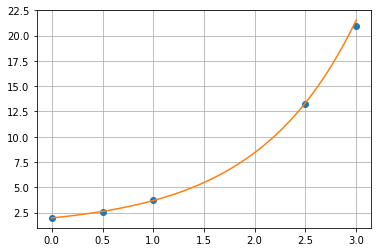

In [153]:
xp = np.linspace(xi[0],xi[-1],51)
plt.plot(xi, yi, "o", xp, g(xp, A[0], A[1]))
plt.grid()
plt.show()

O método aparentemente funcionou mas a verdade é que o chute inicial foi múito próximo da solução o que dá a ilusão de ter funcionado mas como pode ser visto no resultado das iterações os valores permanecem sempre iguais, ou seja, o método não está convergindo.

### Forma correta de abordar esse problema
A forma correta re resolver esse problema é realizar a linearização da função aproximadora subtraindo $1$ e aplicando logaritmo neperiano em ambos os lados da equação, obtendo-se:

$$ln(f(x)-1)=ln(a)+bx$$

Fazemos uma modificação na tabela de pontos e ajustamos uma reta:

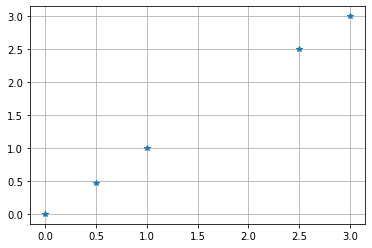

In [161]:
yl=np.log(yi-1)
plt.plot(xi, yl, "*")
plt.grid()
plt.show()

In [163]:
A = np.array([[len(xi), np.sum(xi)],
              [np.sum(xi), np.sum(xi*xi)]])
b = np.array([np.sum(yl), np.sum(yl*xi)])

a = np.linalg.solve(A, b)
print ("A=",A)
print ("b=",b)
print ("SOL=",a)

A= [[ 5.   7. ]
 [ 7.  16.5]]
b= [ 6.96042363 16.46904029]
SOL= [-0.01302365  1.00364884]


In [164]:
K = np.exp(a[0])
B = a[1]
print(K,B)

0.9870607941761933 1.0036488371752603


In [165]:
g = lambda x: 1+K*np.exp(B*x)

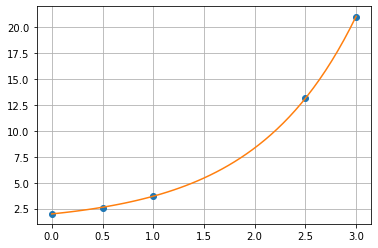

In [167]:
xp = np.linspace(xi[0],xi[-1],51)
plt.plot(xi, yi, "o", xp, g(xp))
plt.grid()
plt.show()

Outra abordagem é usar a solução de $A^T A x=A^T b$ onde as matrizes A e b são tais que 

In [174]:
A = np.array([[1,xi[0]],[1,xi[1]], [1,xi[2]],[1,xi[3]],[1,xi[4]]])
b = yi
print (np.dot(A.T,A))
print (np.dot(A.T,yl))

[[ 5.   7. ]
 [ 7.  16.5]]
[ 6.96042363 16.46904029]


In [175]:
a = np.linalg.solve(np.dot(A.T,A), np.dot(A.T,yl))
print (a)

[-0.01302365  1.00364884]


In [176]:
K = np.exp(a[0])
B = a[1]
print(K,B)

0.9870607941761933 1.00364883717526
